In [35]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from os import listdir
from os.path import isfile, join
import json
onlyfiles = [f for f in listdir("./real-data-copy") if isfile(join("./real-data-copy", f))]



print(len(onlyfiles))
onlyfiles[:5]



123


['csv-2023-12-18-09-35-00-none-1035-iPhone14-0-31.36-61.49-null-NMSnore-NAvgSnore-30.94.csv',
 'csv-2023-12-18-07-42-00-none-1035-iPhone14-0-35.54-43.82-null-NMSnore-NAvgSnore-35.44.csv',
 'csv-2023-12-18-09-09-00-none-1035-iPhone14-0-30.23-39.13-null-NMSnore-NAvgSnore-30.14.csv',
 'csv-2023-12-18-07-59-00-snore-1035-iPhone14-6-33.66-63.51-07-58-20.150-58.83-47.85-32.20.csv',
 'csv-2023-12-18-09-26-00-snore-1035-iPhone14-1-33.28-42.15-09-25-00.610-42.14-42.14-33.11.csv']

In [36]:
def parse_file_name(file_name):
    pattern = r'csv-(\d{4}-\d{2}-\d{2})-(\d{2}-\d{2}-\d{2})-(\w+)-(\d+)-iPhone\d+-(\d+)-(\d+\.\d+)-(\d+\.\d+)-(\d{2}-\d{2}-\d+\.\d+|null)-(NMSnore|\d+\.\d+)-(NAvgSnore|\d+\.\d+)-(\d+\.\d+|\-inf).csv'
    match = re.match(pattern, file_name)
    if match:
        return {
            'date': match.group(1),
            'time': match.group(2),
            'event_type': match.group(3),
            'version': int(match.group(4)),
            'snore_count': int(match.group(5)),
            'avg_db': float(match.group(6)),
            'max_db': float(match.group(7)),
            'start_snore_event_timestamp': match.group(8),
            'max_snore_db': match.group(9),
            'avg_snore_db': match.group(10),
            'noise_level': match.group(11)
        }
    else:
        print(file_name)
        raise Exception('Not possible')

parsed_data = [parse_file_name(fn) for fn in onlyfiles if parse_file_name(fn) is not None]

df = pd.DataFrame(parsed_data)
df['datetime'] = df.apply(lambda row: datetime.strptime(f"{row['date']} {row['time']}", '%Y-%m-%d %H-%M-%S'), axis=1)
df = df.drop(['date', 'time'], axis=1)

df = df.sort_values(by='datetime')

df_hour = df.copy()

df_hour['hour'] = df['datetime'].dt.hour


df.reset_index(inplace=True)
df = df.drop(columns=['index'])
# df.head()
df.describe()
# df_15 = df.loc[0:14]


# df_15


,version,snore_count,avg_db,max_db,datetime
count,123.0,123.000000,123.000000,123.000000,123
mean,1035.0,3.463415,34.423659,51.850244,2023-12-18 08:35:00
min,1035.0,0.000000,29.800000,33.660000,2023-12-18 07:34:00
25%,1035.0,0.000000,33.165000,43.790000,2023-12-18 08:04:30
50%,1035.0,1.000000,34.410000,52.170000,2023-12-18 08:35:00
75%,1035.0,7.000000,35.805000,60.080000,2023-12-18 09:05:30
max,1035.0,15.000000,40.400000,71.500000,2023-12-18 09:36:00
std,0.0,4.490961,2.003583,8.990750,NaN


In [37]:
df.head(15)

,event_type,version,snore_count,avg_db,max_db,start_snore_event_timestamp,max_snore_db,avg_snore_db,noise_level,datetime
0,none,1035,0,37.42,60.93,null,NMSnore,NAvgSnore,-inf,2023-12-18 07:34:00
1,none,1035,0,34.70,41.67,null,NMSnore,NAvgSnore,34.70,2023-12-18 07:35:00
2,none,1035,0,34.41,37.92,null,NMSnore,NAvgSnore,34.41,2023-12-18 07:36:00
3,none,1035,0,35.11,42.18,null,NMSnore,NAvgSnore,35.04,2023-12-18 07:37:00
4,none,1035,0,35.06,42.04,null,NMSnore,NAvgSnore,34.88,2023-12-18 07:38:00
5,none,1035,0,35.43,42.08,null,NMSnore,NAvgSnore,35.35,2023-12-18 07:39:00
6,none,1035,0,35.45,43.97,null,NMSnore,NAvgSnore,35.39,2023-12-18 07:40:00
7,none,1035,0,35.33,43.81,null,NMSnore,NAvgSnore,35.33,2023-12-18 07:41:00
8,none,1035,0,35.54,43.82,null,NMSnore,NAvgSnore,35.44,2023-12-18 07:42:00
9,none,1035,0,35.55,43.77,null,NMSnore,NAvgSnore,35.47,2023-12-18 07:43:00


In [38]:
df['datetime'] = pd.to_datetime(df['datetime'])

aggregated_data = df.resample('15T', on='datetime').agg({
    'avg_db': 'mean',
    'snore_count': 'sum',
    'max_db': 'max',
    'event_type': 'first',
})

aggregated_data.reset_index(inplace=True)

aggregated_data


,datetime,avg_db,snore_count,max_db,event_type
0,2023-12-18 07:30:00,35.540000,3,60.93,none
1,2023-12-18 07:45:00,36.205333,128,67.04,snore
2,2023-12-18 08:00:00,35.107333,78,64.73,snore
3,2023-12-18 08:15:00,35.806000,68,66.37,snore
4,2023-12-18 08:30:00,35.320000,37,60.63,none
5,2023-12-18 08:45:00,33.441333,11,55.01,none
6,2023-12-18 09:00:00,31.374000,5,53.00,none
7,2023-12-18 09:15:00,33.794000,57,71.50,none
8,2023-12-18 09:30:00,32.492857,39,65.04,snore


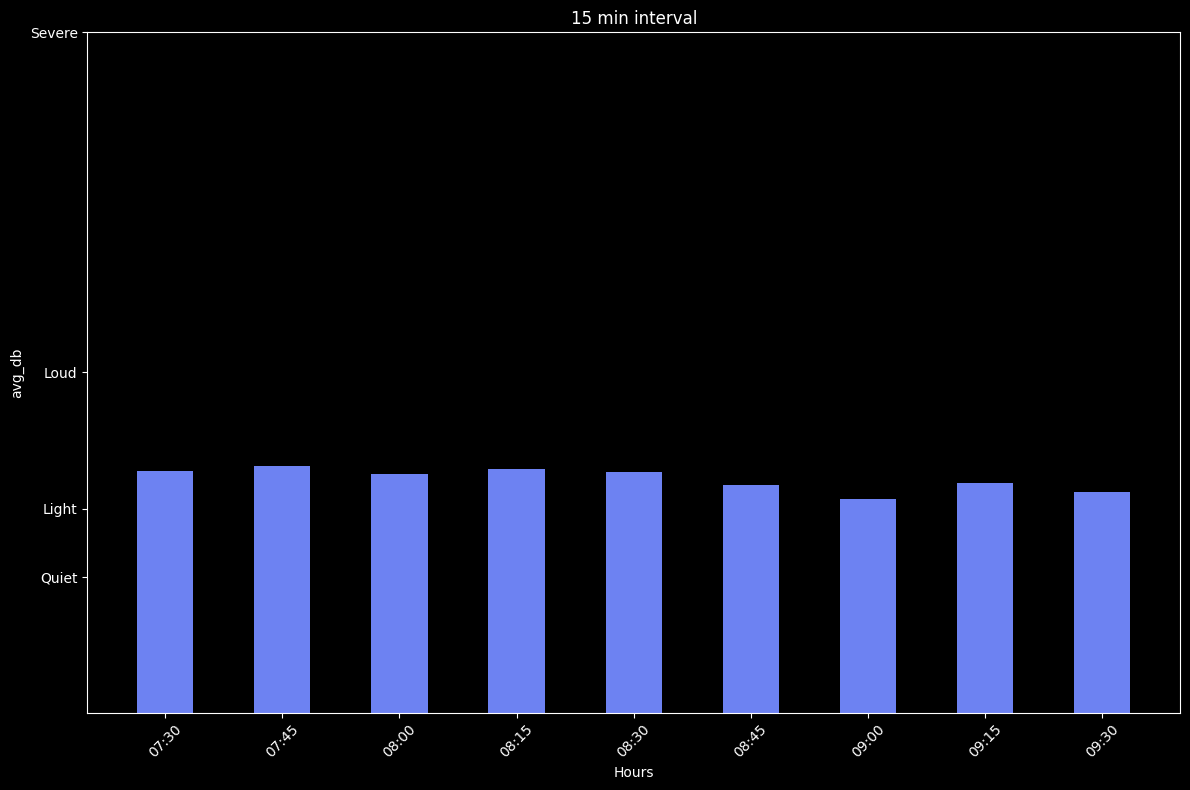

In [39]:
import matplotlib.dates as mdates



db_ranges = {
    'Quiet': (0, 20),
    'Light': (20, 30),
    'Loud': (30, 50),
    'Severe': (50, 100)
}

def get_color(db_value):
    for level, (low, high) in db_ranges.items():
        if low <= db_value < high:
            return level
    return 'Quiet'

aggregated_data['color_level'] = aggregated_data['avg_db'].apply(get_color)

color_map = {
    'Quiet': '#8fcccc',
    'Light': '#73aee5',
    'Loud': '#6d82f2',
    'Severe': '#937ee5'
}

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.005

colors = aggregated_data['color_level'].map(color_map)
ax.bar(aggregated_data['datetime'], aggregated_data['avg_db'], width=bar_width, color=colors, align='center')


ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(rotation=45)

ax.set_xlabel('Hours')
ax.set_ylabel('avg_db')
ax.set_title('15 min interval')

ax.set_yticks([20, 30, 50, 100])
ax.set_yticklabels(['Quiet', 'Light', 'Loud', 'Severe'])

plt.tight_layout()

plt.show()

In [40]:

api_json_object = json.loads(aggregated_data.to_json(orient='records', date_format='iso'))


# with open("dump_graph.json", 'w') as f:
#     json.dump(api_json_object, f, indent=4)

# f.close()



api_json_object[:5]


[{'datetime': '2023-12-18T07:30:00.000',
  'avg_db': 35.54,
  'snore_count': 3,
  'max_db': 60.93,
  'event_type': 'none',
  'color_level': 'Loud'},
 {'datetime': '2023-12-18T07:45:00.000',
  'avg_db': 36.2053333333,
  'snore_count': 128,
  'max_db': 67.04,
  'event_type': 'snore',
  'color_level': 'Loud'},
 {'datetime': '2023-12-18T08:00:00.000',
  'avg_db': 35.1073333333,
  'snore_count': 78,
  'max_db': 64.73,
  'event_type': 'snore',
  'color_level': 'Loud'},
 {'datetime': '2023-12-18T08:15:00.000',
  'avg_db': 35.806,
  'snore_count': 68,
  'max_db': 66.37,
  'event_type': 'snore',
  'color_level': 'Loud'},
 {'datetime': '2023-12-18T08:30:00.000',
  'avg_db': 35.32,
  'snore_count': 37,
  'max_db': 60.63,
  'event_type': 'none',
  'color_level': 'Loud'}]